In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import utils

In [2]:
#creat a random dataset with labels and features
features = np.array([1,2,3,5,6,7])

labels = np.array([155, 197, 244, 356,407,448])


In [3]:
print(features,labels)

[1 2 3 5 6 7] [155 197 244 356 407 448]


In [4]:
def plot_points(features,labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X,y)
    plt.xlabel("number of rooms")
    plt.ylabel("price of house")

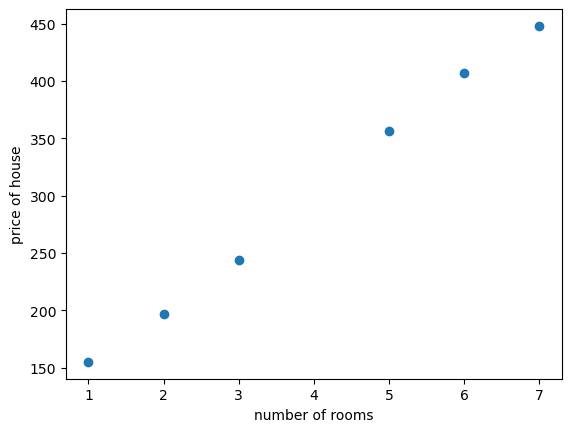

In [5]:
plot_points(features,labels)

# coding the tricks

Linear regression involves moving a line such that it is the best approximation for a set of points. The simple, absolute and square trick are techniques to move a line closer to a point.



   
 


### Simple trick 

In [6]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price =  price_per_room*num_rooms + base_price 
    if (price > predicted_price) & (num_rooms > 0):
        price_per_room +=small_random_1
        base_price += small_random_2
    if (price > predicted_price) & (num_rooms < 0):
        price_per_room -=small_random_1
        base_price += small_random_2
    if (price < predicted_price) & (num_rooms < 0):
        price_per_room -=small_random_1
        base_price += small_random_2
    if (price < predicted_price) & (num_rooms > 0):
        price_per_room -=small_random_1
        base_price -= small_random_2
    return price_per_room, base_price
       

In [13]:
def draw_line(slope,y_intercept,color='grey', linewidth=0.07, starting=0, ending=8):
    x = np.linspace(starting,ending,1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)
    


# Running the linear regression algorithm


In [8]:
import random
random.seed(0)

def linear_regression(features, labels, learning_rate = 0.01, epochs = 500):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range (epochs): 
        if True :
            draw_line(price_per_room,base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = simple_trick(base_price, price_per_room, num_rooms, price)
    draw_line(price_per_room,base_price, 'black',linewidth = 0.7, starting=0, ending=8)
    plot_points(features,labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price
        
        

Price per room: 58.06454523226498
Base price: 60.33986075007896


(58.06454523226498, 60.33986075007896)

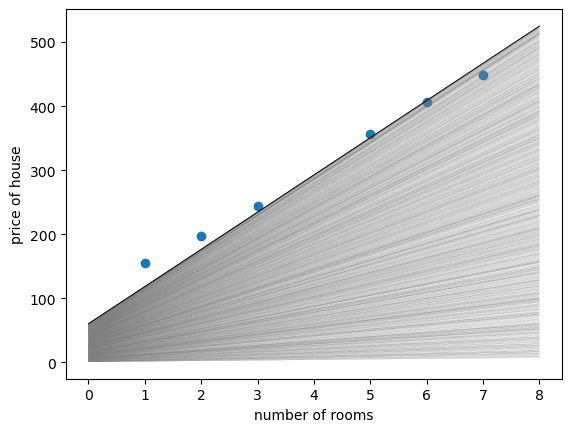

In [9]:
linear_regression(features, labels, learning_rate = 0.01, epochs = 1200)

### Square trick  

In [10]:
def square_trick(base_price, price_per_room, num_rooms,price, learning_rate):
    predicted_price = base_price + num_rooms*price_per_room
    price_per_room += learning_rate*num_rooms*(price - predicted_price)
    base_price += learning_rate*(price - predicted_price)
    return price_per_room, base_price

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

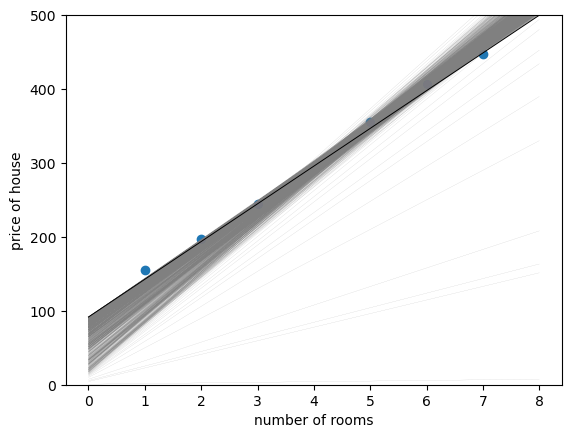

In [11]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                 learning_rate)
    draw_line(price_per_room, base_price, 'black',linewidth = 0.7, starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Absolute trick 

In [15]:
def absolute_trick(base_price, price_per_room, num_rooms, price,learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price> predicted_price:
        price_per_room += num_rooms*learning_rate
        base_price += learning_rate
    else:
        price_per_room -= num_rooms*learning_rate
        base_price -= learning_rate
        
    return price_per_room,base_price

In [ ]:
# import random
random.seed(0)
def linear_regression (features, labels, learning_rate, epochs = 1000):
    price_per_room = random.random() #Generates random values for the slope and the y-intercep
    base_price = random.random()
    for epoch in range(epochs): #Repeats the update step many times
        if True :
            draw_line(price_per_room,base_price, starting =0, ending =8)
        i = random.randint(0, len(features)-1) #Picks a random point on our dataset
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = absolute_trick(base_price,
                                                    price_per_room,
                                                    num_rooms, 
                                                    price,
                                                    learning_rate) #Applies the square trick to move the line closer to our point
    draw_line(price_per_room, base_price, 'black',linewidth = 0.7, starting=0, ending=8)
    plot_points(features, labels)
    print('Price_per_room', price_per_room)
    print('Base_price', base_price)
    return price_per_room, base_price
plt.ylim(0,500)
linear_regression (features, labels, learning_rate = 0.01, epochs = 12000)

### Adding a loss function

In [29]:
def rmse(labels,predictions):
    n = len(labels)
    differences = np.subtract(labels,predictions)
    return np.sqrt(1/n * (np.dot(differences, differences)))

Price per room: 50.35695284007978
Base price: 100.15029234289761


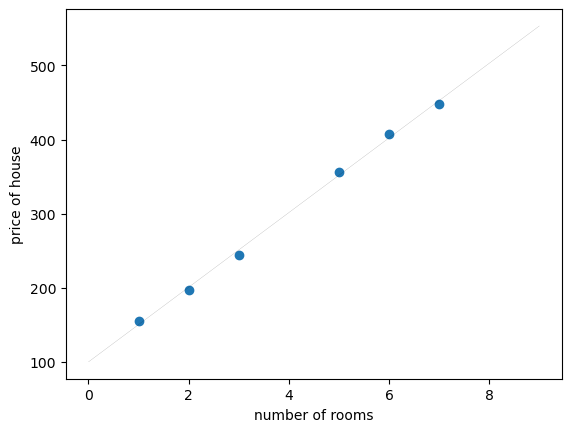

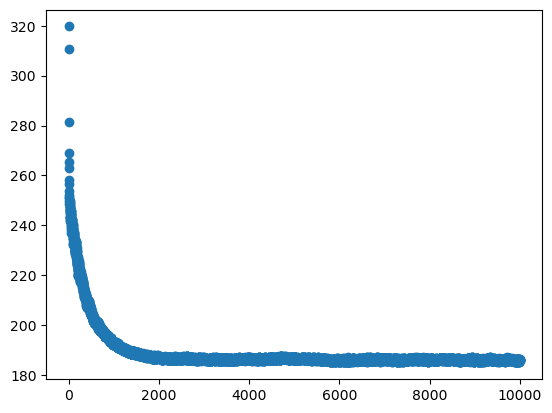

(50.35695284007978, 100.15029234289761)

In [32]:
def linear_regression(features, labels,learning_rate, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range (epochs):
        predictions = features[0] * price_per_room + base_price
        errors.append(rmse(labels,predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)